In [ ]:
import pandas as pd

import sys
sys.path.append('../')

from src.model import predict, train_model

## 0. Test train/test/load model

In [2]:
model, used_categories = train_model.train_model(
    machine_path='../data/machine_info.csv',
    maintenance_path='../data/maintain.csv',
)

<lifelines.CoxPHFitter: fitted with 80 total observations, 49 right-censored observations>
             duration col = 'Time Since Last Fix'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 80
number of events observed = 31
   partial log-likelihood = -117.96
         time fit was run = 2024-11-24 07:34:44 UTC

---
                          coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                 
Thời gian dừng máy (giờ) -0.15      0.86      0.13           -0.40            0.09                0.67                1.10
Số người thực hiện       -0.02      0.98      0.20           -0.43            0.38                0.65                1.46
Điện áp tiêu thụ (V)     -0.00      1.00      0.01           -0.01            0.01                0.99                1.01
Tuổi thọ thiết bị         0.00      1.00      0.00            0.00            0.00                1.00                1.00
Tên thiết bị_OP6          0.85      2.34      0.78           -0.68            2.38                0.51               10.79
Tên thiết bị_OP4          0.57      1.77      0.82           -1.04            2.19                0.35                8.92
Tên thiết bị_Máy rửa      0.29      1.33      0.68           -1.04            1.61                0.35                5.02
Line_B4                  -0.78      0.46      0.89           -2.52            0.96                0.08                2.62
Line_B2                   0.35      1.42      0.78           -1.17            1.87                0.31                6.49
Line_A3                  -0.27      0.76      0.71           -1.67            1.13                0.19                3.09
Line_B6                  -0.10      0.91      0.83           -1.72            1.52                0.18                4.58
Vùng thao tác_5.0        -0.32      0.73      0.80           -1.89            1.24                0.15                3.47
Vùng thao tác_20.0        0.56      1.75      0.74           -0.89            2.02                0.41                7.52
Vùng thao tác_2.0         0.28      1.33      0.59           -0.87            1.44                0.42                4.20
Mã xử lý_4.0             -1.05      0.35      0.97           -2.96            0.85                0.05                2.34
Mã xử lý_2.0             -0.53      0.59      0.61           -1.72            0.67                0.18                1.95
Mã Hiện tượng_99.0       -0.25      0.78      0.73           -1.68            1.19                0.19                3.29
Mã Hiện tượng_31.0        0.75      2.11      0.72           -0.65            2.15                0.52                8.58
Mã Nguyên nhân_99.0       0.57      1.77      0.76           -0.92            2.06                0.40                7.86

                          cmp to     z    p  -log2(p)
covariate                                            
Thời gian dừng máy (giờ)    0.00 -1.22 0.22      2.16
Số người thực hiện          0.00 -0.12 0.91      0.14
Điện áp tiêu thụ (V)        0.00 -0.63 0.53      0.93
Tuổi thọ thiết bị           0.00  2.08 0.04      4.73
Tên thiết bị_OP6            0.00  1.09 0.27      1.87
Tên thiết bị_OP4            0.00  0.70 0.49      1.04
Tên thiết bị_Máy rửa        0.00  0.42 0.67      0.57
Line_B4                     0.00 -0.88 0.38      1.39
Line_B2                     0.00  0.45 0.65      0.62
Line_A3                     0.00 -0.38 0.71      0.50
Line_B6                     0.00 -0.12 0.90      0.14
Vùng thao tác_5.0           0.00 -0.40 0.69      0.54
Vùng thao tác_20.0          0.00  0.76 0.45      1.16
Vùng thao tác_2.0           0.00  0.48 0.63      0.66
Mã xử lý_4.0                0.00 -1.08 0.28      1.84
Mã xử lý_2.0                0.00 -0.86 0.39      1.37
Mã Hiện tượng_99.0          0.00 -0.34 0.74      0.44
Mã Hiện tượng_31.0    

In [3]:
train_model.save_model(
    model=model,
    used_categories=used_categories,
    model_path='../saved_models/model.pkl',
    categories_path='../saved_models/categories.pkl',
)

Model saved to ../saved_models/model.pkl
Used categories saved to ../saved_models/categories.pkl


In [4]:
model, used_categories = train_model.load_model(
    model_path='../saved_models/model.pkl',
    categories_path='../saved_models/categories.pkl',
)

Model loaded from ../saved_models/model.pkl
Used categories loaded from ../saved_models/categories.pkl


<AxesSubplot: xlabel='log(HR) (95% CI)'>

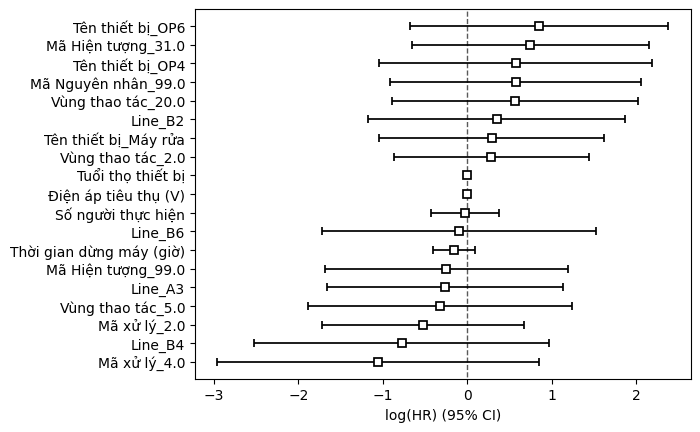

In [5]:
model.plot()

In [6]:
df1 = pd.read_csv('../data/machine_info.csv')
df2 = pd.read_csv('../data/maintain.csv')

## 1. Test get_failure_probability()

In [13]:
predict.get_failure_probability(
    machine_number="VIM 0159",
    model=model,
    a="24-9-2024",
    b="24-9-2025",
    df1=df1,
    df2=df2,
    used_categories=used_categories,
)

{'machine_number': 'VIM 0159',
 'interval': ('24-9-2024', '24-9-2025'),
 'failure_probability': 0.6645911416814554}

## 2. Test recommend_maintenance()

In [8]:
predict.recommend_maintenance(
    machine_number="VIM 0159",
    model=model,
    threshold=0.5,
    df1=df1,
    df2=df2,
    used_categories=used_categories,
)

{'machine_number': 'VIM 0159',
 'threshold': 0.5,
 'recommended_time_date': '17-12-2024'}

In [9]:
df1.head(10)

,Số quản lý thiết bị,Tên thiết bị,Line,Ngày sản xuất,Điện áp tiêu thụ (V)
0,VMI 0082,OP4,B4,08-01-2021,480
1,VMI 0061,OP6,B2,10-12-2021,480
2,VMI 0125,OP2,B6,01-12-2022,440
3,VSC 0031,Máy rửa,A3,08-06-2021,380
4,VMI 0038,OP1,A2,31-03-2022,440
5,VMI 0062,OP7,B2,24-08-2022,415
6,VMI 0105,OP4,B5,28-05-2022,480
7,VSC 0038,Máy rửa,A4,03-05-2021,380
8,VMI 0083,OP5,B4,23-05-2022,480
9,VMI 0127,OP4,B6,25-08-2022,480


## 3. Test risk_ranking()

In [10]:
predict.risk_ranking(
    machine_list=['VMI 0082', 'VIM 0159', 'VSC 0038'],
    date="24-11-2024",
    model=model,
    df1=df1,
    df2=df2,
    used_categories=used_categories,
)

{'rankings': [{'machine_number': 'VSC 0038',
   'survival_probability': 0.5179718727124583},
  {'machine_number': 'VIM 0159', 'survival_probability': 0.6198406826569756},
  {'machine_number': 'VMI 0082', 'survival_probability': 0.6475411566398768}]}

## 4. Test time_to_failure()
(can xem lai)

In [14]:
predict.time_to_failure(
    machine_number="VIM 0159",
    model=model,
    df1=df1,
    df2=df2,
    used_categories=used_categories,
)

{'machine_number': 'VIM 0159', 'expected_failure_date': '06-11-2024'}

## 5. Test covariate_effects

In [12]:
predict.covariate_effects_on_machine(
    machine_number="VIM 0159",
    model=model,
    df1=df1,
    df2=df2,
    used_categories=used_categories,
)

{'machine_number': 'VIM 0159',
 'covariate_effects': {'Thời gian dừng máy (giờ)': {'value': 2.0,
   'log_hazard_ratio': -0.15429401934522063,
   'hazard_ratio': 0.8570200035039904,
   'percent_impact': -14.297999649600957,
   'impact': 'decreases risk',
   'description': "Covariate 'Thời gian dừng máy (giờ)' with value '2.0' decreases failure risk by 14.30%."},
  'Số người thực hiện': {'value': 1.0,
   'log_hazard_ratio': -0.02371048353206723,
   'hazard_ratio': 0.9765684014682698,
   'percent_impact': -2.343159853173016,
   'impact': 'decreases risk',
   'description': "Covariate 'Số người thực hiện' with value '1.0' decreases failure risk by 2.34%."},
  'Điện áp tiêu thụ (V)': {'value': 220.0,
   'log_hazard_ratio': -0.003343589835522314,
   'hazard_ratio': 0.9966619937361804,
   'percent_impact': -0.3338006263819637,
   'impact': 'decreases risk',
   'description': "Covariate 'Điện áp tiêu thụ (V)' with value '220.0' decreases failure risk by 0.33%."},
  'Tuổi thọ thiết bị': {'value